In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('forestfires.csv')
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
data = data.drop(data.columns[11:30], axis = 1)

In [5]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


<AxesSubplot:xlabel='area', ylabel='Density'>

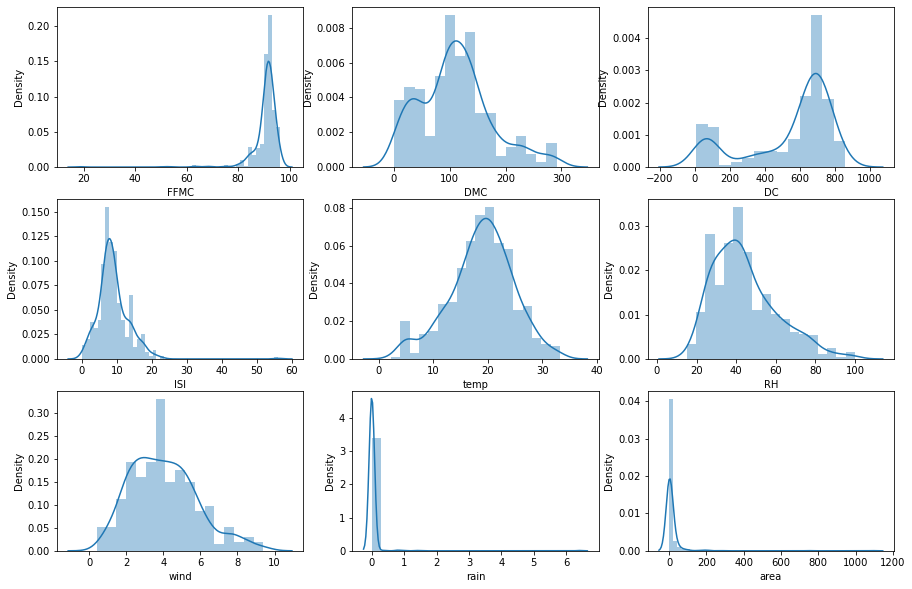

In [6]:
fig, ax = plt.subplots(3, 3, figsize=(15,10))

sns.distplot(data.FFMC, ax=ax[0,0])
sns.distplot(data.DMC, ax=ax[0,1])
sns.distplot(data.DC, ax=ax[0,2])
sns.distplot(data.ISI, ax=ax[1,0])
sns.distplot(data.temp, ax=ax[1,1])
sns.distplot(data.RH, ax=ax[1,2])
sns.distplot(data.wind, ax=ax[2,0])
sns.distplot(data.rain, ax=ax[2,1])
sns.distplot(data.area, ax=ax[2,2])

<AxesSubplot:xlabel='area'>

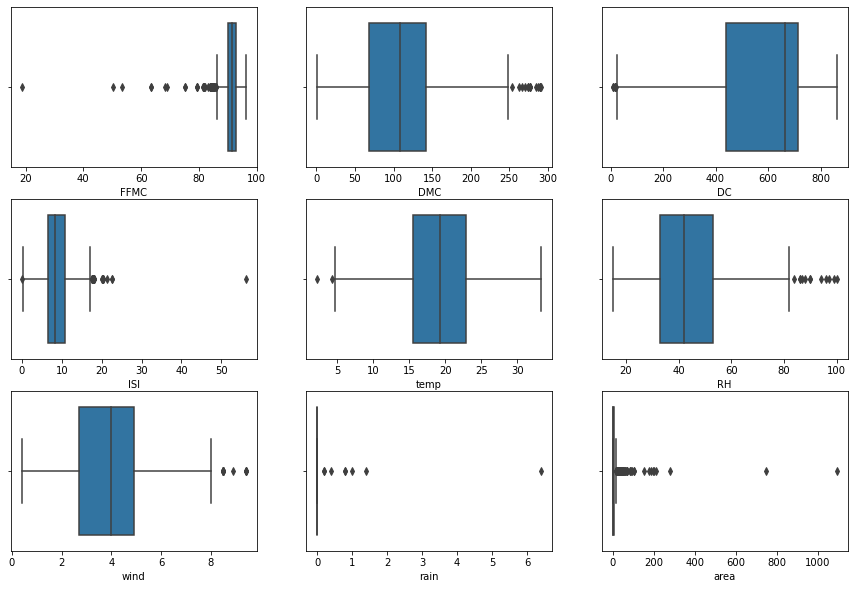

In [7]:
fig, ax = plt.subplots(3, 3, figsize=(15,10))

sns.boxplot(data.FFMC, ax=ax[0,0])
sns.boxplot(data.DMC, ax=ax[0,1])
sns.boxplot(data.DC, ax=ax[0,2])
sns.boxplot(data.ISI, ax=ax[1,0])
sns.boxplot(data.temp, ax=ax[1,1])
sns.boxplot(data.RH, ax=ax[1,2])
sns.boxplot(data.wind, ax=ax[2,0])
sns.boxplot(data.rain, ax=ax[2,1])
sns.boxplot(data.area, ax=ax[2,2])

In [8]:
label_encoder=preprocessing.LabelEncoder()
data["size_category"]=label_encoder.fit_transform(data["size_category"])

In [9]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [10]:
data.month.replace(("jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"),(1,2,3,4,5,6,7,8,9,10,11,12), inplace = True )
data.day.replace(("mon","tue","wed","thu","fri","sat","sun"),(1,2,3,4,5,6,7), inplace = True )

In [11]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [12]:
X = data.iloc[:,0:11].values
Y = data.iloc[:,-1].values

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

#### Constructing a SVM model with Kernel rbf and running it on the grid search to identify the best values

In [14]:
clf = SVC()
param_grid = [{'kernel':['rbf','poly','sigmoid'],'gamma':[50,5,10,0.05],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X,Y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.05],
                          'kernel': ['rbf', 'poly', 'sigmoid']}])

In [15]:
gsv.best_params_ , gsv.best_score_ 

({'C': 15, 'gamma': 50, 'kernel': 'poly'}, 0.968815987933635)

In [16]:
clf = SVC(C= 15, gamma = 50,kernel='poly')
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
acc1 = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc1)
confusion_matrix(Y_test, y_pred)

Accuracy = 98.07692307692307


array([[25,  0],
       [ 2, 77]], dtype=int64)

# Conclusion:
### We have built a Support vector machine that helps classifying the forest fires.